In [1]:
# 0) Install required packages (run once in Colab)
!pip install --quiet pmdarima statsmodels matplotlib seaborn joblib

# sometimes colab has pandas mismatch warnings; ignore


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 689.1/689.1 kB 22.4 MB/s eta 0:00:00


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('bitcoin_data_2014_to_2025.csv')
data.head()

,Date,Close,High,Low,Open,Volume
0,2014-09-17,457.334015,468.174011,452.421997,465.864014,21056800
1,2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200
2,2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700
3,2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600
4,2014-09-21,398.821014,412.425995,393.181000,408.084991,26580100


In [3]:
data.columns

Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [5]:
data=data.drop(columns=['High','Low','Open','Volume'])
data.head()

,Date,Close
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990
3,2014-09-20,408.903992
4,2014-09-21,398.821014


In [6]:
data=data.rename(columns={'Date':'ds','Close':'y'})
data.head()

,ds,y
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990
3,2014-09-20,408.903992
4,2014-09-21,398.821014


In [9]:
data['ds']=pd.to_datetime(data['ds'])
print(data.head())
data.dtypes

          ds           y
0 2014-09-17  457.334015
1 2014-09-18  424.440002
2 2014-09-19  394.795990
3 2014-09-20  408.903992
4 2014-09-21  398.821014


,0
ds,datetime64[ns]
y,float64


In [11]:
data['returns']=data['y'].pct_change()
print(data.head())
data.tail()

          ds           y   returns
0 2014-09-17  457.334015       NaN
1 2014-09-18  424.440002 -0.071926
2 2014-09-19  394.795990 -0.069843
3 2014-09-20  408.903992  0.035735
4 2014-09-21  398.821014 -0.024659


,ds,y,returns
4090,2025-11-28,90919.265625,-0.004011
4091,2025-11-29,90851.757812,-0.000743
4092,2025-11-30,90394.312500,-0.005035
4093,2025-12-01,86321.570312,-0.045055
4094,2025-12-02,87785.914062,0.016964


In [13]:
data['log_returns']=np.log(data['y']).diff()
print(data.head())
data.tail()

          ds           y   returns  log_returns
0 2014-09-17  457.334015       NaN          NaN
1 2014-09-18  424.440002 -0.071926    -0.074643
2 2014-09-19  394.795990 -0.069843    -0.072402
3 2014-09-20  408.903992  0.035735     0.035111
4 2014-09-21  398.821014 -0.024659    -0.024968


,ds,y,returns,log_returns
4090,2025-11-28,90919.265625,-0.004011,-0.004019
4091,2025-11-29,90851.757812,-0.000743,-0.000743
4092,2025-11-30,90394.312500,-0.005035,-0.005048
4093,2025-12-01,86321.570312,-0.045055,-0.046102
4094,2025-12-02,87785.914062,0.016964,0.016822


In [20]:
temp_data=pd.read_csv('bitcoin_data_2014_to_2025.csv')
data['volatility']=temp_data['High']-temp_data['Low']
print(data.head())
print(data.tail())

          ds           y   returns  log_returns  volatility
0 2014-09-17  457.334015       NaN          NaN   15.752014
1 2014-09-18  424.440002 -0.071926    -0.074643   43.755981
2 2014-09-19  394.795990 -0.069843    -0.072402   43.302979
3 2014-09-20  408.903992  0.035735     0.035111   33.412994
4 2014-09-21  398.821014 -0.024659    -0.024968   19.244995
             ds             y   returns  log_returns   volatility
4090 2025-11-28  90919.265625 -0.004011    -0.004019  2711.968750
4091 2025-11-29  90851.757812 -0.000743    -0.000743   927.429688
4092 2025-11-30  90394.312500 -0.005035    -0.005048  1570.734375
4093 2025-12-01  86321.570312 -0.045055    -0.046102  6535.906250
4094 2025-12-02  87785.914062  0.016964     0.016822  1562.312500


In [21]:
data['volume_norm']=(temp_data['Volume']-temp_data['Volume'].mean())/temp_data['Volume'].std()
print(data.head())
print(data.tail())

          ds           y   returns  log_returns  volatility  volume_norm
0 2014-09-17  457.334015       NaN          NaN   15.752014    -0.939431
1 2014-09-18  424.440002 -0.071926    -0.074643   43.755981    -0.938843
2 2014-09-19  394.795990 -0.069843    -0.072402   43.302979    -0.938693
3 2014-09-20  408.903992  0.035735     0.035111   33.412994    -0.938739
4 2014-09-21  398.821014 -0.024659    -0.024968   19.244995    -0.939189
             ds             y   returns  log_returns   volatility  volume_norm
4090 2025-11-28  90919.265625 -0.004011    -0.004019  2711.968750     1.728146
4091 2025-11-29  90851.757812 -0.000743    -0.000743   927.429688     0.721406
4092 2025-11-30  90394.312500 -0.005035    -0.005048  1570.734375     0.746652
4093 2025-12-01  86321.570312 -0.045055    -0.046102  6535.906250     2.914245
4094 2025-12-02  87785.914062  0.016964     0.016822  1562.312500     2.125907


In [22]:
data['ma7'] = temp_data['Close'].rolling(7).mean()
print(data.head())
print(data.tail())

          ds           y   returns  log_returns  volatility  volume_norm  ma7
0 2014-09-17  457.334015       NaN          NaN   15.752014    -0.939431  NaN
1 2014-09-18  424.440002 -0.071926    -0.074643   43.755981    -0.938843  NaN
2 2014-09-19  394.795990 -0.069843    -0.072402   43.302979    -0.938693  NaN
3 2014-09-20  408.903992  0.035735     0.035111   33.412994    -0.938739  NaN
4 2014-09-21  398.821014 -0.024659    -0.024968   19.244995    -0.939189  NaN
             ds             y   returns  log_returns   volatility  \
4090 2025-11-28  90919.265625 -0.004011    -0.004019  2711.968750   
4091 2025-11-29  90851.757812 -0.000743    -0.000743   927.429688   
4092 2025-11-30  90394.312500 -0.005035    -0.005048  1570.734375   
4093 2025-12-01  86321.570312 -0.045055    -0.046102  6535.906250   
4094 2025-12-02  87785.914062  0.016964     0.016822  1562.312500   

      volume_norm           ma7  
4090     1.728146  88541.261161  
4091     0.721406  89427.460938  
4092     0.7466

In [24]:
data['returns'] = data['returns'].fillna(0)
data['log_returns'] = data['log_returns'].fillna(0)
print(data.head())
print(data.tail())

          ds           y   returns  log_returns  volatility  volume_norm  ma7
0 2014-09-17  457.334015  0.000000     0.000000   15.752014    -0.939431  NaN
1 2014-09-18  424.440002 -0.071926    -0.074643   43.755981    -0.938843  NaN
2 2014-09-19  394.795990 -0.069843    -0.072402   43.302979    -0.938693  NaN
3 2014-09-20  408.903992  0.035735     0.035111   33.412994    -0.938739  NaN
4 2014-09-21  398.821014 -0.024659    -0.024968   19.244995    -0.939189  NaN
             ds             y   returns  log_returns   volatility  \
4090 2025-11-28  90919.265625 -0.004011    -0.004019  2711.968750   
4091 2025-11-29  90851.757812 -0.000743    -0.000743   927.429688   
4092 2025-11-30  90394.312500 -0.005035    -0.005048  1570.734375   
4093 2025-12-01  86321.570312 -0.045055    -0.046102  6535.906250   
4094 2025-12-02  87785.914062  0.016964     0.016822  1562.312500   

      volume_norm           ma7  
4090     1.728146  88541.261161  
4091     0.721406  89427.460938  
4092     0.7466

In [26]:
data.head(10)

,ds,y,returns,log_returns,volatility,volume_norm,ma7
0,2014-09-17,457.334015,0.000000,0.000000,15.752014,-0.939431,NaN
1,2014-09-18,424.440002,-0.071926,-0.074643,43.755981,-0.938843,NaN
2,2014-09-19,394.795990,-0.069843,-0.072402,43.302979,-0.938693,NaN
3,2014-09-20,408.903992,0.035735,0.035111,33.412994,-0.938739,NaN
4,2014-09-21,398.821014,-0.024659,-0.024968,19.244995,-0.939189,NaN
5,2014-09-22,402.152008,0.008352,0.008317,9.785980,-0.939297,NaN
6,2014-09-23,435.790985,0.083647,0.080333,45.360016,-0.938378,417.462572
7,2014-09-24,423.204987,-0.028881,-0.029306,14.980011,-0.939012,412.586997
8,2014-09-25,411.574005,-0.027483,-0.027868,14.052002,-0.939179,410.748997
9,2014-09-26,404.424988,-0.017370,-0.017523,14.928986,-0.939414,412.124568


In [27]:
data = data.dropna(subset=['ma7']).reset_index(drop=True)
print(data.head())
print(data.tail())

          ds           y   returns  log_returns  volatility  volume_norm  \
0 2014-09-23  435.790985  0.083647     0.080333   45.360016    -0.938378   
1 2014-09-24  423.204987 -0.028881    -0.029306   14.980011    -0.939012   
2 2014-09-25  411.574005 -0.027483    -0.027868   14.052002    -0.939179   
3 2014-09-26  404.424988 -0.017370    -0.017523   14.928986    -0.939414   
4 2014-09-27  399.519989 -0.012128    -0.012202    9.250977    -0.939696   

          ma7  
0  417.462572  
1  412.586997  
2  410.748997  
3  412.124568  
4  410.783997  
             ds             y   returns  log_returns   volatility  \
4084 2025-11-28  90919.265625 -0.004011    -0.004019  2711.968750   
4085 2025-11-29  90851.757812 -0.000743    -0.000743   927.429688   
4086 2025-11-30  90394.312500 -0.005035    -0.005048  1570.734375   
4087 2025-12-01  86321.570312 -0.045055    -0.046102  6535.906250   
4088 2025-12-02  87785.914062  0.016964     0.016822  1562.312500   

      volume_norm           ma7 

In [28]:
data.columns

Index(['ds', 'y', 'returns', 'log_returns', 'volatility', 'volume_norm',
       'ma7'],
      dtype='object')

In [30]:
from prophet import Prophet
model=Prophet()
model.add_regressor('returns')
model.add_regressor('log_returns')
model.add_regressor('volatility')
model.add_regressor('volume_norm')
model.add_regressor('ma7')

In [31]:
model.fit(data)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [33]:
data.to_csv('prophet_prepared_data.csv',index=False)

In [35]:
# get last row of your df
last = data.iloc[-1]

future_dates = pd.date_range(start=data.iloc[-1]['ds'] + pd.Timedelta(days=1),
periods=30, freq='D')

In [36]:
# create future df
future = pd.DataFrame({'ds': future_dates})

# repeat last known regressor values
future['returns'] = last['returns']
future['log_returns'] = last['log_returns']
future['volatility'] = last['volatility']
future['volume_norm'] = last['volume_norm']
future['ma7'] = last['ma7']

In [40]:
forecast = model.predict(future)

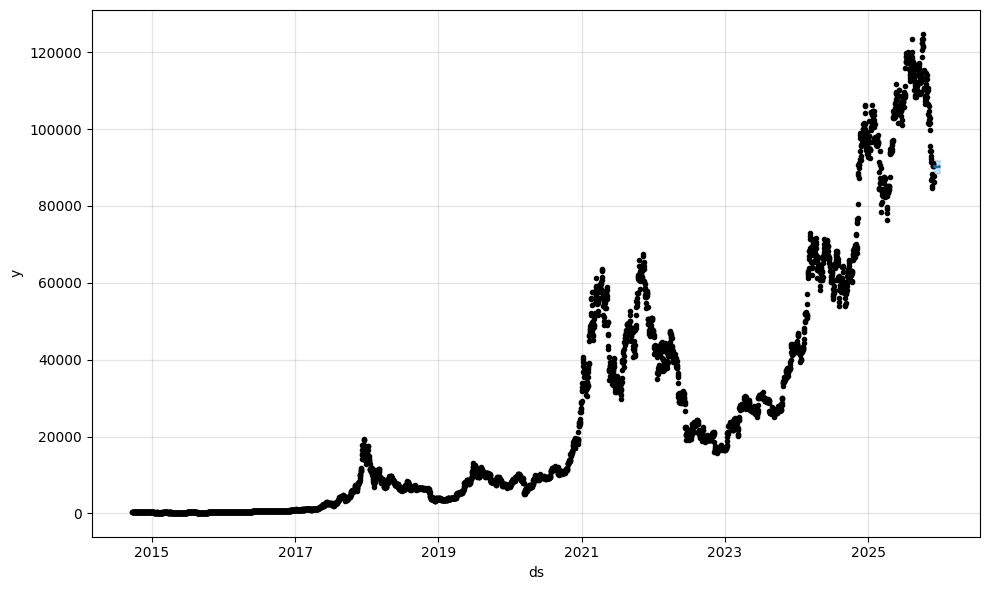

In [42]:
model.plot(forecast)
plt.show()


In [43]:
import pickle

with open("prophet_model.pkl", "wb") as f:
    pickle.dump(model, f)
